# Water masses of the future

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import xarray as xr
import gcsfs

import warnings
warnings.simplefilter("ignore")

In [3]:
fs = gcsfs.GCSFileSystem(token='anon', access='read_only')

In [4]:
cat = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
#cat = pd.read_csv('ftp://ftp.cgd.ucar.edu/archive/aletheia-data/intake-esm-datastore/catalogs/glade-cmip6.csv')
#cat.info()

In [5]:
# define a simple search on keywords
def search_df(df, verbose= False, **search):
    "search by keywords - if list, then match exactly, otherwise match as substring"
    keys = ['activity_id','institution_id','source_id','experiment_id','member_id', 'table_id', 'variable_id', 'grid_label']
    d = df
    for skey in search.keys():
        
        if isinstance(search[skey], str):  # match a string as a substring
            d = d[d[skey].str.contains(search[skey])]
        else:
            dk = []
            for key in search[skey]:       # match a list of strings exactly
                dk += [d[d[skey]==key]]
            d = pd.concat(dk)
            keys.remove(skey)
    if verbose:
        for key in keys:
            print(key,' = ',list(d[key].unique()))      
    return d

## Load CMIP6 datasets

In [33]:
picontrol = search_df(cat, experiment_id=['piControl'], 
                      source_id=['CESM2', 'GFDL-CM4'],
                      table_id='Omon', 
                      variable_id=['thetao', 'so'], 
                      grid_label=['gr'], verbose=True)

activity_id  =  ['CMIP']
institution_id  =  ['NCAR', 'NOAA-GFDL']
member_id  =  ['r1i1p1f1']
table_id  =  ['Omon']


In [35]:
historical = search_df(cat, experiment_id=['historical'], 
                       source_id=['CESM2', 'GFDL-CM4'],
                       table_id='Omon', 
                       variable_id=['thetao', 'so'], 
                       grid_label=['gr'], verbose=True)

activity_id  =  ['CMIP']
institution_id  =  ['NCAR', 'NOAA-GFDL']
member_id  =  ['r10i1p1f1', 'r11i1p1f1', 'r1i1p1f1', 'r2i1p1f1', 'r3i1p1f1', 'r4i1p1f1', 'r5i1p1f1', 'r6i1p1f1', 'r7i1p1f1', 'r8i1p1f1', 'r9i1p1f1']
table_id  =  ['Omon']


In [30]:
ssp585 = search_df(cat, experiment_id=['ssp585'], table_id='Omon',
                   variable_id=['thetao', 'so'], 
                   grid_label=['gr'], verbose=True)

activity_id  =  ['ScenarioMIP']
institution_id  =  ['NCAR', 'NOAA-GFDL']
source_id  =  ['CESM2-WACCM', 'CESM2', 'GFDL-CM4']
member_id  =  ['r1i1p1f1', 'r2i1p1f1']
table_id  =  ['Omon']


In [39]:
#ssp585 = search_df(cat, table_id='Omon', variable_id=['thetao', 'so'], 
#                   grid_label=['gn'], verbose=True)

In [9]:
#zstores_hist = historical.zstore.unique()
#
#dset_dict_hist = {}
#for zstore in zstores_hist:
#    name = zstore.split('gs://cmip6/')[1].replace('/','.')[:-1]
#    print(name)
#
#    ds = xr.open_zarr(fs.get_mapper(zstore))       # DO NOT USE "decode_times = False"
#    print(dict(ds.dims),'\n')
#    
#    dset_dict_hist[name] = ds

In [10]:
zstores_control = picontrol.zstore.unique()

dset_dict_control = {}
for zstore in zstores_control:
    name = zstore.split('gs://cmip6/')[1].replace('/','.')[:-1]
    print(name)

    ds = xr.open_zarr(fs.get_mapper(zstore))       # DO NOT USE "decode_times = False"
    print(dict(ds.dims),'\n')
    
    dset_dict_control[name] = ds

CMIP.NASA-GISS.GISS-E2-1-H.piControl.r1i1p1f1.Omon.thetao.gr
{'bnds': 2, 'lat': 180, 'lev': 33, 'lon': 360, 'time': 4812} 

CMIP.NCAR.CESM2-WACCM.piControl.r1i1p1f1.Omon.thetao.gr
{'d2': 2, 'lat': 180, 'lev': 33, 'lon': 360, 'time': 5988} 

CMIP.NCAR.CESM2.piControl.r1i1p1f1.Omon.thetao.gr
{'d2': 2, 'lat': 180, 'lev': 33, 'lon': 360, 'time': 14400} 

CMIP.NOAA-GFDL.GFDL-CM4.piControl.r1i1p1f1.Omon.thetao.gr
{'bnds': 2, 'lat': 180, 'lev': 35, 'lon': 360, 'time': 6000} 

CMIP.NOAA-GFDL.GFDL-ESM4.piControl.r1i1p1f1.Omon.thetao.gr
{'bnds': 2, 'lat': 180, 'lev': 35, 'lon': 360, 'time': 6000} 

CMIP.NASA-GISS.GISS-E2-1-H.piControl.r1i1p1f1.Omon.so.gr
{'bnds': 2, 'lat': 180, 'lev': 33, 'lon': 360, 'time': 4812} 

CMIP.NCAR.CESM2-WACCM.piControl.r1i1p1f1.Omon.so.gr
{'d2': 2, 'lat': 180, 'lev': 33, 'lon': 360, 'time': 5988} 

CMIP.NCAR.CESM2.piControl.r1i1p1f1.Omon.so.gr
{'d2': 2, 'lat': 180, 'lev': 33, 'lon': 360, 'time': 14400} 

CMIP.NOAA-GFDL.GFDL-CM4.piControl.r1i1p1f1.Omon.so.gr
{'bnds': 

## First test with xhistogram

In [11]:
from xhistogram.xarray import histogram

In [12]:
CM4_thetao_piC = dset_dict_control['CMIP.NOAA-GFDL.GFDL-CM4.piControl.r1i1p1f1.Omon.thetao.gr']
CM4_thetao_piC

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 180, lev: 35, lon: 360, time: 6000)
Coordinates:
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(180, 2), meta=np.ndarray>
  * lev        (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
    lev_bnds   (lev, bnds) float64 dask.array<chunksize=(35, 2), meta=np.ndarray>
  * lon        (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(360, 2), meta=np.ndarray>
  * time       (time) object 0151-01-16 12:00:00 ... 0650-12-16 12:00:00
    time_bnds  (time, bnds) object dask.array<chunksize=(6000, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    thetao     (time, lev, lat, lon) float32 dask.array<chunksize=(25, 35, 180, 360), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.7 CMIP-6.0 UGRID-1.0
    activity_id:            CMIP
    branch

In [13]:
CM4_so_piC = dset_dict_control['CMIP.NOAA-GFDL.GFDL-CM4.piControl.r1i1p1f1.Omon.so.gr']
CM4_so_piC

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 180, lev: 35, lon: 360, time: 6000)
Coordinates:
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(180, 2), meta=np.ndarray>
  * lev        (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
    lev_bnds   (lev, bnds) float64 dask.array<chunksize=(35, 2), meta=np.ndarray>
  * lon        (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(360, 2), meta=np.ndarray>
  * time       (time) object 0151-01-16 12:00:00 ... 0650-12-16 12:00:00
    time_bnds  (time, bnds) object dask.array<chunksize=(6000, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    so         (time, lev, lat, lon) float32 dask.array<chunksize=(35, 35, 180, 360), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.7 CMIP-6.0 UGRID-1.0
    activity_id:            CMIP
    branch

In [14]:
CESM2_so_piC = dset_dict_control['CMIP.NCAR.CESM2.piControl.r1i1p1f1.Omon.so.gr']

In [15]:
CESM2_thetao_piC = dset_dict_control['CMIP.NCAR.CESM2.piControl.r1i1p1f1.Omon.thetao.gr']

In [16]:
#CESM2_thetao_piC = dset_dict_control['CMIP.NCAR.CESM2.piControl.r1i1p1f1.Omon.thetao.gr']

In [17]:
sbins = np.arange(31, 38, 0.025)
tbins = np.arange(-2, 32, 0.1)

In [23]:
# Create a dz variable, all datasets are on common grid so this should work with everything
dz = np.diff(CESM2_thetao_piC['lev'])
dz =np.insert(dz, 0, dz[0])
dz = xr.DataArray(dz, coords= {'lev': CESM2_thetao_piC['lev']}, dims='lev')

# weight by volume of grid cell (resolution = 5degree, 1degree=110km)
dVol = dz * (110e3) * (110e3*np.cos(CESM2_thetao_piC['lat']*np.pi/180))

In [24]:
hTS_CESM2 = histogram(CESM2_so_piC['so'].isel(time=slice(0,12)),
                      CESM2_thetao_piC['thetao'].isel(time=slice(0,12)),
                      bins=[sbins, tbins],
                      dim=('lon', 'lat', 'lev'),
                      weights=dVol)

In [25]:
hTS_CESM2

<xarray.DataArray 'histogram_so_thetao' (time: 12, so_bin: 279, thetao_bin: 339)>
dask.array<getitem, shape=(12, 279, 339), dtype=float64, chunksize=(11, 279, 339), chunktype=numpy.ndarray>
Coordinates:
  * time        (time) object 0001-01-15 12:59:59 ... 0001-12-15 12:00:00
  * so_bin      (so_bin) float64 31.01 31.04 31.06 31.09 ... 37.91 37.94 37.96
  * thetao_bin  (thetao_bin) float64 -1.95 -1.85 -1.75 ... 31.65 31.75 31.85

In [26]:
vol_nadw = hTS_CESM2.sel(so_bin=slice(34.8, 35.), 
                         thetao_bin=slice(1.5,4)).sum(dim=['so_bin', 'thetao_bin'])

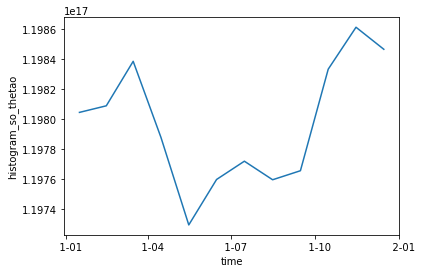

In [27]:
vol_nadw.plot()

In [ ]:
hTS_CM4 = histogram(CM4_thetao_piC['thetao'],
                      CM4_so_piC['so'],
                      bins=[sbins, tbins])

In [ ]:
CESM2_so_piC.chunk({'time': 25})